In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from nltk.stem import PorterStemmer
import nltk
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EGYPT_LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EGYPT_LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data=pd.read_csv("train.csv")
testData=pd.read_csv('test.csv')

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [5]:
testData.head(2)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?


In [6]:
data.head(1)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0


In [7]:
testData.head(1)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...


<AxesSubplot:ylabel='is_duplicate'>

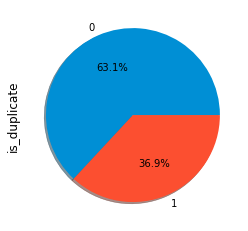

In [8]:
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
f,ax=plt.subplots(1)
data['is_duplicate'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)

<AxesSubplot:xlabel='is_duplicate'>

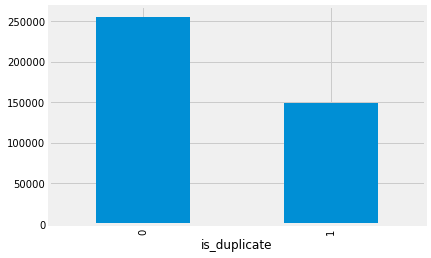

In [9]:
data.groupby("is_duplicate")['id'].count().plot.bar()

In [10]:
data = data.sample(35000, random_state=2)
testData =data.sample(10000, random_state=10)
testData2=testData

<AxesSubplot:ylabel='is_duplicate'>

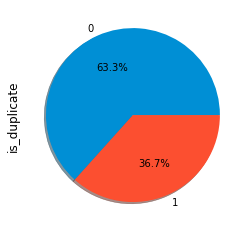

In [11]:
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
f,ax=plt.subplots(1)
data['is_duplicate'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)

<AxesSubplot:ylabel='is_duplicate'>

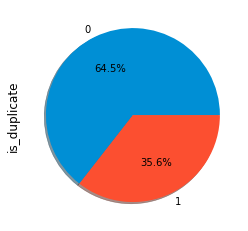

In [12]:
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
f,ax=plt.subplots(1)
testData['is_duplicate'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)

In [13]:
data['question1']=data['question1'].apply(lambda x : " ".join(x.lower()  for x in str(x).split()))
data['question2']=data['question2'].apply(lambda x : " ".join(x.lower()  for x in str(x).split()))

testData['question1']=testData['question1'].apply(lambda x : " ".join(x.lower()  for x in str(x).split()))
testData['question2']=testData['question2'].apply(lambda x : " ".join(x.lower()  for x in str(x).split()))

In [14]:
# stop=stopwords.words('english')
# data['question1_non_stop']=data['question1'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
# data['question2_non_stop']=data['question2'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))

#testData['question1_non_stop']=testData['question1'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
#testData['question2_non_stop']=testData['question2'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))

In [15]:
import string
string.punctuation
def removePunctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [16]:
data['question1']=data['question1'].apply( lambda x :removePunctuation(str(x)))
data['question2']=data['question2'].apply( lambda x :removePunctuation(str(x)))

testData['question1']=testData['question1'].apply( lambda x :removePunctuation(str(x)))
testData['question2']=testData['question2'].apply( lambda x :removePunctuation(str(x)))

In [17]:
data.head(1)

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1


In [18]:
import re
def give_emoji_free_text(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF"
            u"\U00002500-\U00002BEF" 
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  
            u"\u3030"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text) 

In [19]:

data['question1']=data['question1'].apply( lambda x: give_emoji_free_text(x))
data['question2']=data['question2'].apply( lambda x: give_emoji_free_text(x))

testData['question1']=testData['question1'].apply( lambda x: give_emoji_free_text(x))
testData['question2']=testData['question2'].apply( lambda x: give_emoji_free_text(x))


In [20]:

emoji_pattern = re.compile('[\W_]+')
emoji_pattern.sub(' ','step> step guide invest share market india')

'step step guide invest share market india'

In [21]:
import re
te = re.compile('[\W_]+')
data['question1']=data['question1'].apply( lambda x: te.sub(' ', x))
data['question2']=data['question2'].apply( lambda x: te.sub(' ', x))

testData['question1']=testData['question1'].apply( lambda x: te.sub(' ', x))
testData['question2']=testData['question2'].apply( lambda x: te.sub(' ', x))


In [22]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace special characters with their string equivalents.
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    
    return q

In [23]:
data['question1'] = data['question1'].apply(preprocess)
data['question2'] = data['question2'].apply(preprocess)

testData['question1'] = testData['question1'].apply(preprocess)
testData['question2'] = testData['question2'].apply(preprocess)

In [24]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0


In [25]:
from nltk.tokenize import word_tokenize
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

In [26]:
data['question1_token']=data['question1'].apply(lambda x: tokenization(x))
data['question2_token']=data['question2'].apply(lambda x: tokenization(x))

testData['question1_token']=testData['question1'].apply(lambda x: tokenization(x))
testData['question2_token']=testData['question2'].apply(lambda x: tokenization(x))

In [27]:
data.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,question1_token,question2_token
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t..."


In [28]:
testData.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,question1_token,question2_token
319007,319007,103029,444408,how many calories do you eat a day,how many calories should i eat a day,0,"[how, many, calories, do, you, eat, a, day]","[how, many, calories, should, i, eat, a, day]"


In [29]:
st=PorterStemmer()
def stemming(text):
    stem_text = ' '.join([st.stem(word) for word in text])
    return stem_text


In [30]:
data['question1_stem']=data['question1_token'].apply(lambda x: stemming(x))
data['question2_stem']=data['question2_token'].apply(lambda x: stemming(x))

testData['question1_stem']=testData['question1_token'].apply(lambda x: stemming(x))
testData['question2_stem']=testData['question2_token'].apply(lambda x: stemming(x))

In [31]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EGYPT_LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
data["ques1_lemi"] = data["question1"].apply(lambda text: lemmatize_words(text))
data["ques2_lemi"] = data["question2"].apply(lambda text: lemmatize_words(text))

In [33]:
testData["ques1_lemi"] = testData["question1"].apply(lambda text: lemmatize_words(text))
testData["ques2_lemi"] = testData["question2"].apply(lambda text: lemmatize_words(text))

In [34]:
data = data.drop(['question1','question2'], axis=1)
testData = testData.drop(['question1','question2'], axis=1)

In [35]:
data.head(1)

,id,qid1,qid2,is_duplicate,question1_token,question2_token,question1_stem,question2_stem,ques1_lemi,ques2_lemi
398782,398782,496695,532029,1,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",what is the best market autom tool for small a...,what is the best market autom tool for small a...,what is the best marketing automation tool for...,what is the best marketing automation tool for...


In [36]:
testData.head(1)

,id,qid1,qid2,is_duplicate,question1_token,question2_token,question1_stem,question2_stem,ques1_lemi,ques2_lemi
319007,319007,103029,444408,0,"[how, many, calories, do, you, eat, a, day]","[how, many, calories, should, i, eat, a, day]",how mani calori do you eat a day,how mani calori should i eat a day,how many calorie do you eat a day,how many calorie should i eat a day


In [37]:
# merge texts
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(data['ques1_lemi']) + list(data['ques2_lemi'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [38]:
temp_df1 = pd.DataFrame(q1_arr, index= data.index)
temp_df2 = pd.DataFrame(q2_arr, index= data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(35000, 6000)

In [39]:
temp_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
231614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202295,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
306199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220608,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
185330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# merge texts
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questionstest = list(testData['ques1_lemi']) + list(testData['ques2_lemi'])

cvtest = CountVectorizer(max_features=3000)
q1_arrTest, q2_arrTest = np.vsplit(cv.fit_transform(questionstest).toarray(),2)

In [41]:
temp_df1Test = pd.DataFrame(q1_arr, index= data.index)
temp_df2Test = pd.DataFrame(q2_arr, index= data.index)
temp_dfTest= pd.concat([temp_df1Test, temp_df2Test], axis=1)
temp_dfTest.shape

(35000, 6000)

In [42]:
temp_df['is_duplicate'] = data['is_duplicate']

temp_dfTest['is_duplicate'] = testData['is_duplicate']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [44]:
data['q1_len'] = data['ques1_lemi'].str.len() 
data['q2_len'] = data['ques2_lemi'].str.len()

In [45]:
testData['q1_len'] = testData['ques1_lemi'].str.len() 
testData['q2_len'] = testData['ques2_lemi'].str.len()

In [46]:
# data['lenQ1']=data['question1_token'].apply(lambda x: len(x))
# data['lenQ2']=data['question2_token'].apply(lambda x: len(x))

#testData['lenQ1']=testData['question1_token'].apply(lambda x: len(x))
#testData['lenQ2']=testData['question2_token'].apply(lambda x: len(x))

In [47]:
data['q1_num_words'] = data['ques1_lemi'].apply(lambda row: len(row.split(" ")))
data['q2_num_words'] = data['ques2_lemi'].apply(lambda row: len(row.split(" ")))
data.sample(5)

,id,qid1,qid2,is_duplicate,question1_token,question2_token,question1_stem,question2_stem,ques1_lemi,ques2_lemi,q1_len,q2_len,q1_num_words,q2_num_words
130179,130179,120637,13823,1,"[what, was, the, best, happening, or, moment, ...","[can, you, describe, the, best, moment, in, yo...",what wa the best happen or moment in your life,can you describ the best moment in your life,what wa the best happening or moment in your life,can you describe the best moment in your life,49,45,10,9
355612,355612,484854,484855,1,"[i, have, done, my, diploma, in, ent, and, ive...","[i, have, done, my, diploma, in, ent, and, ive...",i have done my diploma in ent and ive work for...,i have done my diploma in ent and ive work for...,i have done my diploma in ent and ive worked f...,i have done my diploma in ent and ive worked f...,122,135,26,26
151795,151795,238609,238610,0,"[how, can, i, be, a, freelancer]","[how, do, i, freelance, in, india]",how can i be a freelanc,how do i freelanc in india,how can i be a freelancer,how do i freelance in india,25,27,6,6
348527,348527,469416,20676,1,"[what, is, a, black, hole, made, of]","[what, are, black, holes, really, made, of]",what is a black hole made of,what are black hole realli made of,what is a black hole made of,what are black hole really made of,28,34,7,7
35565,35565,64957,64958,0,"[how, do, you, charge, your, macbook, pro, wit...","[what, is, the, best, terminal, emulator, for,...",how do you charg your macbook pro without a ch...,what is the best termin emul for mac os x,how do you charge your macbook pro without a c...,what is the best terminal emulator for mac o x,52,46,10,10


In [48]:
testData['q1_num_words'] = testData['ques1_lemi'].apply(lambda row: len(row.split(" ")))
testData['q2_num_words'] = testData['ques2_lemi'].apply(lambda row: len(row.split(" ")))
testData.sample(5)

,id,qid1,qid2,is_duplicate,question1_token,question2_token,question1_stem,question2_stem,ques1_lemi,ques2_lemi,q1_len,q2_len,q1_num_words,q2_num_words
75607,75607,129362,129363,0,"[wheres, a, great, bar, in, lower, manhattan, ...","[if, a, friend, of, yours, comes, to, hong, ko...",where a great bar in lower manhattan to watch ...,if a friend of your come to hong kong where wi...,wheres a great bar in lower manhattan to watch...,if a friend of yours come to hong kong where w...,167,66,32,15
59634,59634,104417,40995,1,"[what, are, the, best, career, options, for, e...","[what, are, the, career, options, available, i...",what are the best career option for electr eng...,what are the career option avail if i pursu md...,what are the best career option for electrical...,what are the career option available if i purs...,95,99,15,16
186356,186356,284263,284264,0,"[why, is, weed, legal, in, n, korea]","[why, is, weed, not, legalized, in, all, count...",whi is weed legal in n korea,whi is weed not legal in all countri,why is weed legal in n korea,why is weed not legalized in all country,28,40,7,8
304402,304402,59780,305267,1,"[where, is, the, craziest, place, you, have, h...","[which, is, the, craziest, place, you, ever, h...",where is the craziest place you have had sex,which is the craziest place you ever had sex,where is the craziest place you have had sex,which is the craziest place you ever had sex,44,44,9,9
179922,179922,18385,65753,1,"[my, dob, is, 22031992, 310, am, bhilai, chhat...","[what, is, the, prediction, for, my, career, f...",my dob is 22031992 310 am bhilai chhatisgarhho...,what is the predict for my career financ marri...,my dob is 22031992 310 am bhilai chhatisgarhho...,what is the prediction for my career finance m...,111,134,18,22


In [49]:
data.head(1)

,id,qid1,qid2,is_duplicate,question1_token,question2_token,question1_stem,question2_stem,ques1_lemi,ques2_lemi,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,1,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",what is the best market autom tool for small a...,what is the best market autom tool for small a...,what is the best marketing automation tool for...,what is the best marketing automation tool for...,72,73,12,12


In [50]:
testData.head(1)

,id,qid1,qid2,is_duplicate,question1_token,question2_token,question1_stem,question2_stem,ques1_lemi,ques2_lemi,q1_len,q2_len,q1_num_words,q2_num_words
319007,319007,103029,444408,0,"[how, many, calories, do, you, eat, a, day]","[how, many, calories, should, i, eat, a, day]",how mani calori do you eat a day,how mani calori should i eat a day,how many calorie do you eat a day,how many calorie should i eat a day,33,35,8,8


In [51]:
#############################################################################################################################

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
def countVectorizerTransform(x1,x2):
    c=[x1,x2]
    h=CountVectorizer()
    g=h.fit_transform(c)
    return g

<AxesSubplot:ylabel='is_duplicate'>

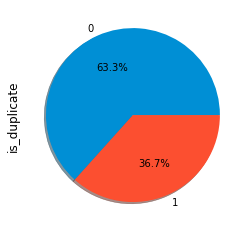

In [53]:
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
f,ax=plt.subplots(1)
data['is_duplicate'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)

In [54]:
qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())

C:\Users\EGYPT_~1\AppData\Local\Temp/ipykernel_4128/2971487394.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Maximum number of times a single question is repeated: 10



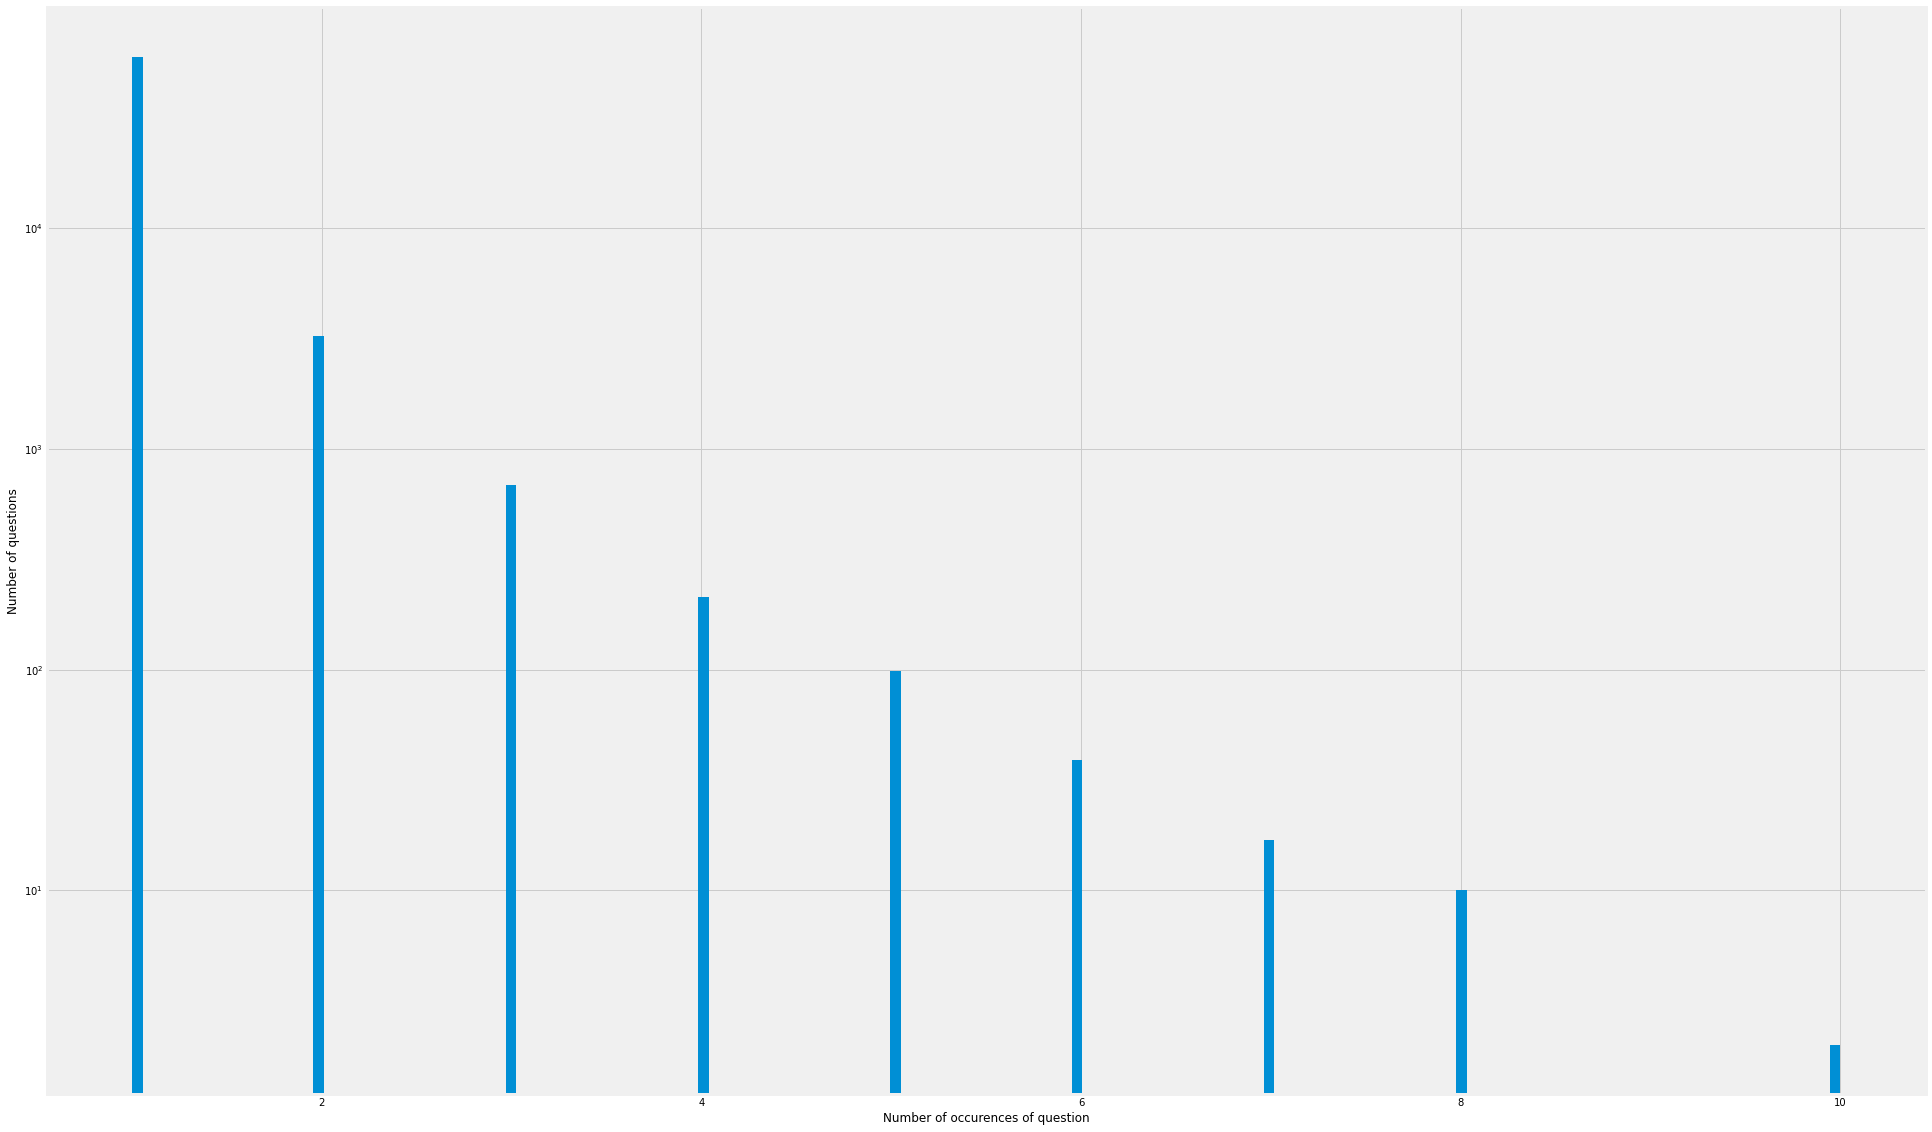

In [55]:
plt.figure(figsize=(30, 20))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [56]:
data['q1_Total_words'] = data['ques1_lemi'].apply(lambda row: len(row.split(" ")))
data['q2_Total_words'] = data['ques2_lemi'].apply(lambda row: len(row.split(" ")))

In [57]:
testData['q1_Total_words'] = testData['ques1_lemi'].apply(lambda row: len(row.split(" ")))
testData['q2_Total_words'] = testData['ques2_lemi'].apply(lambda row: len(row.split(" ")))

In [58]:
data['freqOFqid1'] = data.groupby('qid1')['qid1'].transform('count') 
data['freqOFqid2'] = data.groupby('qid2')['qid2'].transform('count')

In [59]:
testData['freqOFqid1'] = testData.groupby('qid1')['qid1'].transform('count') 
testData['freqOFqid2'] = testData.groupby('qid2')['qid2'].transform('count')

In [60]:

data['q1len_of_liters'] = data['ques1_lemi'].str.len() 
data['q2len_of_liters'] = data['ques2_lemi'].str.len()

In [61]:
testData['q1len_of_liters'] = testData['ques1_lemi'].str.len() 
testData['q2len_of_liters'] = testData['ques2_lemi'].str.len()

In [62]:
def getCommnWord(row):
    w1 = set(map(lambda word: word.lower().strip(), row['ques1_lemi'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['ques2_lemi'].split(" ")))    
    return 1.0 * len(w1 & w2)
data['word_Common'] = data.apply(getCommnWord, axis=1)

testData['word_Common'] = testData.apply(getCommnWord, axis=1)

In [63]:
def getWordsInRow(row):
    w1 = set(map(lambda word: word.lower().strip(), row['ques1_lemi'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['ques2_lemi'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))
data['word_Total'] = data.apply(getWordsInRow, axis=1)

testData['word_Total'] = testData.apply(getWordsInRow, axis=1)

In [64]:
def getSharedWord(row):
    w1 = set(map(lambda word: word.lower().strip(), row['ques1_lemi'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['ques2_lemi'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

data['word_share'] = data.apply(getSharedWord, axis=1)

testData['word_share'] = testData.apply(getSharedWord, axis=1)


In [65]:
data['freq_q1+q2'] = data['freqOFqid1']+data['freqOFqid2']
data['freq_q1-q2'] = abs(data['freqOFqid1']-data['freqOFqid2'])


In [66]:
testData['freq_q1+q2'] = testData['freqOFqid1']+testData['freqOFqid2']
testData['freq_q1-q2'] = abs(testData['freqOFqid1']-testData['freqOFqid2'])

In [67]:
data.head(1)

,id,qid1,qid2,is_duplicate,question1_token,question2_token,question1_stem,question2_stem,ques1_lemi,ques2_lemi,...,q2_Total_words,freqOFqid1,freqOFqid2,q1len_of_liters,q2len_of_liters,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
398782,398782,496695,532029,1,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",what is the best market autom tool for small a...,what is the best market autom tool for small a...,what is the best marketing automation tool for...,what is the best marketing automation tool for...,...,12,1,1,72,73,11.0,24.0,0.458333,2,0


In [68]:
testData.head(1)

,id,qid1,qid2,is_duplicate,question1_token,question2_token,question1_stem,question2_stem,ques1_lemi,ques2_lemi,...,q2_Total_words,freqOFqid1,freqOFqid2,q1len_of_liters,q2len_of_liters,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
319007,319007,103029,444408,0,"[how, many, calories, do, you, eat, a, day]","[how, many, calories, should, i, eat, a, day]",how mani calori do you eat a day,how mani calori should i eat a day,how many calorie do you eat a day,how many calorie should i eat a day,...,8,1,1,33,35,6.0,16.0,0.375,2,0


In [69]:
final_df = data.drop(columns=['id','qid1','qid2','ques1_lemi','ques2_lemi','question1_token','question2_token','question1_stem',
'question2_stem'
])
print(final_df.shape)
final_df.head()

(35000, 16)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,q1_Total_words,q2_Total_words,freqOFqid1,freqOFqid2,q1len_of_liters,q2len_of_liters,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
398782,1,72,73,12,12,12,12,1,1,72,73,11.0,24.0,0.458333,2,0
115086,0,47,55,12,15,12,15,1,1,47,55,7.0,22.0,0.318182,2,0
327711,0,101,115,25,17,25,17,1,1,101,115,2.0,34.0,0.058824,2,0
367788,0,54,140,12,30,12,30,1,1,54,140,0.0,31.0,0.000000,2,0
151235,0,33,48,5,9,5,9,1,1,33,48,3.0,13.0,0.230769,2,0


In [70]:
final_dfTest = testData.drop(columns=['id','qid1','qid2','ques1_lemi','ques2_lemi','question1_token','question2_token','question1_stem',
'question2_stem'
])
print(final_dfTest.shape)
final_dfTest.head()

(10000, 16)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,q1_Total_words,q2_Total_words,freqOFqid1,freqOFqid2,q1len_of_liters,q2len_of_liters,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
319007,0,33,35,8,8,8,8,1,1,33,35,6.0,16.0,0.375000,2,0
274286,0,63,147,12,27,12,27,1,1,63,147,3.0,36.0,0.083333,2,0
43833,0,79,101,14,22,14,22,1,1,79,101,5.0,32.0,0.156250,2,0
334826,0,47,49,9,9,9,9,1,1,47,49,8.0,18.0,0.444444,2,0
13665,1,57,88,10,16,10,16,1,1,57,88,6.0,21.0,0.285714,2,0


In [71]:
final_df = pd.concat([final_df, temp_df], axis=1)

In [72]:
final_dfTest = pd.concat([final_dfTest, temp_dfTest], axis=1)

In [73]:
# corr=final_df.corr()
# corr

In [74]:
final_df.columns

Index([   'is_duplicate',          'q1_len',          'q2_len',
          'q1_num_words',    'q2_num_words',  'q1_Total_words',
        'q2_Total_words',      'freqOFqid1',      'freqOFqid2',
       'q1len_of_liters',
       ...
                    2991,              2992,              2993,
                    2994,              2995,              2996,
                    2997,              2998,              2999,
          'is_duplicate'],
      dtype='object', length=6017)

In [75]:
# import models and data set
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9955714285714286

In [78]:
# dic
model_params={
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[5,10,15,20,30,35],
            'criterion':["gini", "entropy"]
        }
    },
    "LogisticRegression":{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10,15]
        }
    },
    "GaussianNB":{
        'model':GaussianNB(),
        'params':{

        }
    },
    "MultinomialNB":{
        'model':MultinomialNB(),
        'params':{
            'alpha':[1,2,3,4],
            'fit_prior':[True,False],

        }
    },
    "DecisionTreeClassifier":{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':["gini", "entropy"],
            'splitter':["best", "random"],
            'max_depth':[5,10,15,20],
            'max_features':["auto", "sqrt", "log2"]
        }
    },
}

In [79]:

from sklearn.model_selection import GridSearchCV
scorre=[]
for mn,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(final_df.iloc[:,1:].values,final_df.iloc[:,0].values)
    scorre.append({
        'model name ': mn,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })

df=pd.DataFrame(scorre)
df

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,model name,best_score,best_params
0,RandomForestClassifier,0.994686,"{'criterion': 'entropy', 'n_estimators': 35}"
1,LogisticRegression,1.000000,{'C': 1}
2,GaussianNB,0.991057,{}
3,MultinomialNB,0.898543,"{'alpha': 4, 'fit_prior': True}"
4,DecisionTreeClassifier,0.792771,"{'criterion': 'gini', 'max_depth': 20, 'max_fe..."


In [80]:
modelLog=LogisticRegression(C=1)
modelLog.fit(X_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [81]:
modelLog.score(X_test,y_test)

1.0

In [82]:
X_test

array([[54., 38., 14., ...,  0.,  0.,  1.],
       [26., 20.,  6., ...,  0.,  0.,  0.],
       [29., 29.,  5., ...,  0.,  0.,  1.],
       ...,
       [31., 35.,  6., ...,  0.,  0.,  0.],
       [39., 38.,  9., ...,  0.,  0.,  0.],
       [42., 44.,  9., ...,  0.,  0.,  1.]])

In [83]:
p=modelLog.predict(X_test)

In [84]:
p[:10],y_test[:10]

(array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64),
 array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64))

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [86]:


model = Sequential()
model.add(Dense(512, activation='relu', input_dim=6016))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3080704   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 16)                4112      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,478,817
Trainable params: 3,478,817
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,epochs=10, batch_size=500)

Epoch 1/10
70/70 [==============================] - 3s 39ms/step - loss: 0.5702 - accuracy: 0.7039
Epoch 2/10
70/70 [==============================] - 3s 39ms/step - loss: 0.3748 - accuracy: 0.8913
Epoch 3/10
70/70 [==============================] - 3s 43ms/step - loss: 0.4505 - accuracy: 0.6922
Epoch 4/10
70/70 [==============================] - 3s 41ms/step - loss: 0.1006 - accuracy: 0.9739
Epoch 5/10
70/70 [==============================] - 3s 39ms/step - loss: 0.0578 - accuracy: 0.9829
Epoch 6/10
70/70 [==============================] - 3s 41ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 7/10
70/70 [==============================] - 3s 44ms/step - loss: 1.7201e-04 - accuracy: 1.0000
Epoch 8/10
70/70 [==============================] - 3s 41ms/step - loss: 6.6171e-05 - accuracy: 1.0000
Epoch 9/10
70/70 [==============================] - 3s 40ms/step - loss: 3.5489e-05 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 3s 39ms/step - loss: 1.7968e-05 - accuracy: 

In [89]:
#X_train,y_train
model.fit(X_train,y_train,epochs=10, batch_size=500)


Epoch 1/10
56/56 [==============================] - 2s 39ms/step - loss: 9.4439e-06 - accuracy: 1.0000
Epoch 2/10
56/56 [==============================] - 2s 40ms/step - loss: 5.6423e-06 - accuracy: 1.0000
Epoch 3/10
56/56 [==============================] - 2s 40ms/step - loss: 3.8770e-06 - accuracy: 1.0000
Epoch 4/10
56/56 [==============================] - 2s 38ms/step - loss: 2.8277e-06 - accuracy: 1.0000
Epoch 5/10
56/56 [==============================] - 2s 40ms/step - loss: 2.1586e-06 - accuracy: 1.0000
Epoch 6/10
56/56 [==============================] - 2s 40ms/step - loss: 1.7505e-06 - accuracy: 1.0000
Epoch 7/10
56/56 [==============================] - 2s 39ms/step - loss: 1.4348e-06 - accuracy: 1.0000
Epoch 8/10
56/56 [==============================] - 2s 41ms/step - loss: 1.1934e-06 - accuracy: 1.0000
Epoch 9/10
56/56 [==============================] - 2s 39ms/step - loss: 1.0221e-06 - accuracy: 1.0000
Epoch 10/10
56/56 [==============================] - 2s 40ms/step - loss: